# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

##### Import libraries

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

##### Creating dataframe 

In [4]:
age_values=[17, 51, 27, 21, 36, 48, 19, 26, 54, 50]
tardies_values=[10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_id_values=[np.arange(1,11,1)]

student_data = pd.DataFrame({'age': age_values, 'tardies': tardies_values})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,50,3


##### Draw a dispersion diagram (scatter plot) for the data.

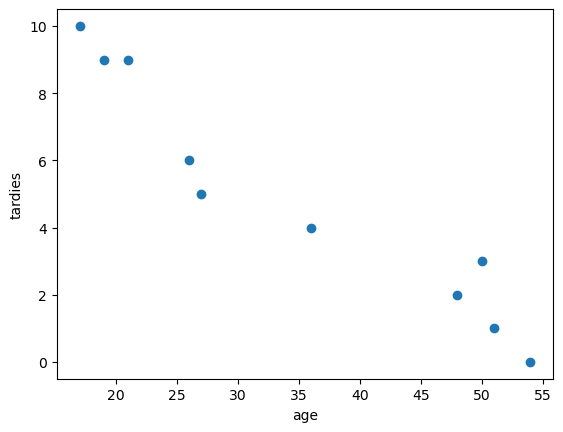

In [5]:
#scatter plot - plot 2 measures

plt.scatter(student_data[["age"]], student_data["tardies"])
plt.xlabel("age")
plt.ylabel("tardies")
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
"""the younger the age the greater the tardiness"""


'the younger the age the greater the tardiness'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

##### correlation

In [7]:
#using Pearson Correlation
from scipy.stats import pearsonr
pearsonr(student_data["age"], student_data["tardies"])

PearsonRResult(statistic=-0.9592311640286788, pvalue=1.1504937824669299e-05)

In [8]:
"""
my pearsonr result is 0.95 which indicates a highly correlated.
"""

'\nmy pearsonr result is 0.95 which indicates a highly correlated.\n'

In [9]:
#Using Spearman Correlation
display(student_data["age"].sort_values(ascending=False))
display(student_data["tardies"].sort_values(ascending=False))
spearmanr(student_data["age"], student_data["tardies"])[0]

8    54
1    51
9    50
5    48
4    36
2    27
7    26
3    21
6    19
0    17
Name: age, dtype: int64

0    10
3     9
6     9
7     6
2     5
4     4
9     3
5     2
1     1
8     0
Name: tardies, dtype: int64

-0.9848069807617047

In [10]:
"""
my spearman result is -0.98 which indicates a highly correlated as its close to -1.
"""

'\nmy spearman result is -0.98 which indicates a highly correlated as its close to -1.\n'

##### covariance

In [11]:
x = student_data['age']
y = student_data['tardies']
covariance = np.cov(x, y)[0][1]

print("Covariance:", covariance)

Covariance: -49.788888888888884


In [12]:
"""
we have a negative covariance between age and tardiness. 
If the hypothesis is correct we would expect findings show a negative covariance.
"""

'\nwe have a negative covariance between age and tardiness. \nIf the hypothesis is correct we would expect findings show a negative covariance.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

#### Building of regression model

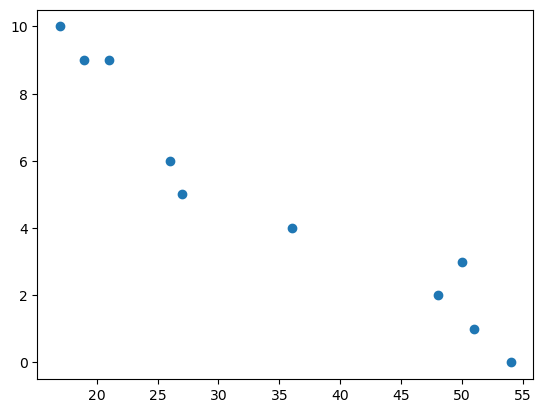

In [13]:
x = student_data[['age']]
y = student_data['tardies']

plt.scatter(x, y)
plt.show()

In [14]:
model=LinearRegression()
model.fit(x,y)

slope = model.coef_
interception=model.intercept_

print(f"Slope of our REG line is {slope} \n Y-intercept is {interception}") 
"""I selected to use linear regression model. 
Results were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892."""

Slope of our REG line is [-0.23182782] 
 Y-intercept is 12.990791039370894


'I selected to use linear regression model. \nResults were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892.'

Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

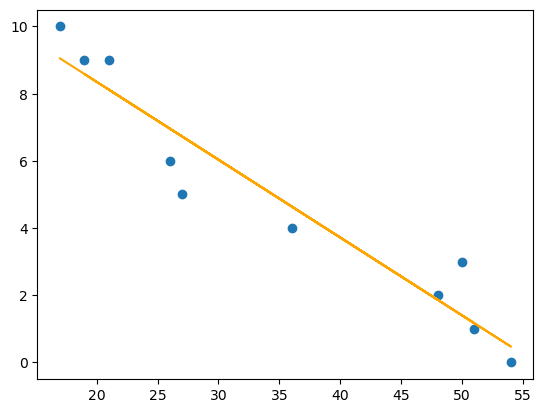

#### Checking whether this is a good model

In [16]:

print("r^2 is ", model.score(x,y))
pred = model.predict(x)
print("Root of mean squared error is : ",np.sqrt(mean_squared_error(pred, y)))

r^2 is  0.9201244260438143
Root of mean squared error is :  0.9496289959585993


#### Summary

In [17]:
"""
I selected to use linear regression model. 
Results were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892.  
The negative slope indicates an inverse relationship between the age and the tardiness which aligns with the hypothesis. 
To score my model, also calculated >R^2 and RSME.
The linear regression model has a high R^2 value, indicating a strong fit to the data and good explanatory power. 
Additionally, the low RMSE suggests that the model's predictions are close to the actual values on average. 
These results are generally positive and indicate a well-performing model. 
"""

"\nI selected to use linear regression model. \nResults were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892.  \nThe negative slope indicates an inverse relationship between the age and the tardiness which aligns with the hypothesis. \nTo score my model, also calculated >R^2 and RSME.\nThe linear regression model has a high R^2 value, indicating a strong fit to the data and good explanatory power. \nAdditionally, the low RMSE suggests that the model's predictions are close to the actual values on average. \nThese results are generally positive and indicate a well-performing model. \n"

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
"""
I selected to use linear regression model. 
Results were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892.  
The negative slope indicates an inverse relationship between the age and the tardiness which aligns with the hypothesis. 
To score my model, also calculated >R^2 and RSME.
The linear regression model has a high R^2 value, indicating a strong fit to the data and good explanatory power. 
Additionally, the low RMSE suggests that the model's predictions are close to the actual values on average. 
These results are generally positive and indicate a well-performing model.
They may be other factors to consider however the model indicates there is a negative correlation between age and tardiness which corresponds with the hypothesis.
""" 

"\nI selected to use linear regression model. \nResults were, Slope of our REG line is [-0.23182782] Y-intercept is 12.990791039370892.  \nThe negative slope indicates an inverse relationship between the age and the tardiness which aligns with the hypothesis. \nTo score my model, also calculated >R^2 and RSME.\nThe linear regression model has a high R^2 value, indicating a strong fit to the data and good explanatory power. \nAdditionally, the low RMSE suggests that the model's predictions are close to the actual values on average. \nThese results are generally positive and indicate a well-performing model.\nThey may be other factors to consider however the model indicates there is a negative correlation between age and tardiness which corresponds with the hypothesis.\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data
vehicles_data=pd.read_csv("vehicles.csv") 
vehicles_data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

#### Correlation

In [20]:
#Correlation between Year and CO2 Emission Grams/Mile

print("The pearsonr correlation is ", pearsonr(vehicles_data["Year"], vehicles_data["CO2 Emission Grams/Mile"]))
print("The spearmanr correlation is ",spearmanr(vehicles_data["Year"], vehicles_data["CO2 Emission Grams/Mile"])[0])

The pearsonr correlation is  PearsonRResult(statistic=-0.2222996029505486, pvalue=0.0)
The spearmanr correlation is  -0.21510814957047247


In [21]:
"""
for correlation between Year and CO2 Emission Grams/Mile:
the spearmanr rank correlation coefficieny of -0.215, indicates a  weak monotonic negative relationship. 
the pearsonr correlation coefficency of -0.222, indicates a weak negative linear relationship.
"""

'\nfor correlation between Year and CO2 Emission Grams/Mile:\nthe spearmanr rank correlation coefficieny of -0.215, indicates a  weak monotonic negative relationship. \nthe pearsonr correlation coefficency of -0.222, indicates a weak negative linear relationship.\n'

In [22]:
#Correlation between Cylinders and CO2 Emission Grams/Mile

print("The pearsonr correlation is ", pearsonr(vehicles_data["Cylinders"], vehicles_data["CO2 Emission Grams/Mile"]))
print("The spearmanr correlation is ",spearmanr(vehicles_data["Cylinders"], vehicles_data["CO2 Emission Grams/Mile"])[0])

The pearsonr correlation is  PearsonRResult(statistic=0.7523925537298068, pvalue=0.0)
The spearmanr correlation is  0.7887773868160683


In [23]:
"""
for correlation between Cylinders and CO2 Emission Grams/Mile:
the spearmanr rank correlation coefficieny of 0.788, indicates a strong positive relationship . 
the pearsonr correlation coefficency of 0.752, indicates a a strong positive linear relationship.
as a whole there appears more correlation"""

'\nfor correlation between Cylinders and CO2 Emission Grams/Mile:\nthe spearmanr rank correlation coefficieny of 0.788, indicates a strong positive relationship . \nthe pearsonr correlation coefficency of 0.752, indicates a a strong positive linear relationship.\nas a whole there appears more correlation'

In [24]:
#Correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile

print("The pearsonr correlation is ", pearsonr(vehicles_data["Fuel Barrels/Year"], vehicles_data["CO2 Emission Grams/Mile"]))
print("The spearmanr correlation is ",spearmanr(vehicles_data["Fuel Barrels/Year"], vehicles_data["CO2 Emission Grams/Mile"])[0])

The pearsonr correlation is  PearsonRResult(statistic=0.9861886621428828, pvalue=0.0)
The spearmanr correlation is  0.9955387414551938


In [25]:
"""
for correlation between Barrels/Year and CO2 Emission Grams/Mile:
the spearmanr rank correlation coefficieny of 0.99, indicates a very strong positive relationship . 
the pearsonr correlation coefficency of 0.98, indicates a very strong positive linear relationship.
as a whole there is an indication of very strong correlation"""

'\nfor correlation between Barrels/Year and CO2 Emission Grams/Mile:\nthe spearmanr rank correlation coefficieny of 0.99, indicates a very strong positive relationship . \nthe pearsonr correlation coefficency of 0.98, indicates a very strong positive linear relationship.\nas a whole there is an indication of very strong correlation'

In [26]:
#Correlation between Combined MPG and CO2 Emission Grams/Mile

print("The pearsonr correlation is ", pearsonr(vehicles_data["Combined MPG"], vehicles_data["CO2 Emission Grams/Mile"]))
print("The spearmanr correlation is ",spearmanr(vehicles_data["Combined MPG"], vehicles_data["CO2 Emission Grams/Mile"])[0])

The pearsonr correlation is  PearsonRResult(statistic=-0.9262290389336565, pvalue=0.0)
The spearmanr correlation is  -0.9952582161002361


In [27]:
"""
for correlation between Combined MPG and CO2 Emission Grams/Mile:
the spearmanr rank correlation coefficieny of -0.995, indicates a very strong monotonic negative relationship . 
the pearsonr correlation coefficency of 0.92, indicates a very strong linear negative relationship.
as a whole there is an indication of very strong negative correlation"""

'\nfor correlation between Combined MPG and CO2 Emission Grams/Mile:\nthe spearmanr rank correlation coefficieny of -0.995, indicates a very strong monotonic negative relationship . \nthe pearsonr correlation coefficency of 0.92, indicates a very strong linear negative relationship.\nas a whole there is an indication of very strong negative correlation'

In [28]:
#Correlation between Fuel Cost/Year and CO2 Emission Grams/Mile

print("The pearsonr correlation is ", pearsonr(vehicles_data["Fuel Cost/Year"], vehicles_data["CO2 Emission Grams/Mile"]))
print("The spearmanr correlation is ",spearmanr(vehicles_data["Fuel Cost/Year"], vehicles_data["CO2 Emission Grams/Mile"])[0])

The pearsonr correlation is  PearsonRResult(statistic=0.930865151220206, pvalue=0.0)
The spearmanr correlation is  0.9227225976823775


In [29]:
"""
for correlation between Fuel Cost/Year and CO2 Emission Grams/Mile:
the spearmanr rank correlation coefficieny of 0.92, indicates a very strong monotonic positive relationship . 
the pearsonr correlation coefficency of 0.93, indicates a very strong linear negative relationship.
as a whole there is an indication of very strong correlation"""

'\nfor correlation between Fuel Cost/Year and CO2 Emission Grams/Mile:\nthe spearmanr rank correlation coefficieny of 0.92, indicates a very strong monotonic positive relationship . \nthe pearsonr correlation coefficency of 0.93, indicates a very strong linear negative relationship.\nas a whole there is an indication of very strong correlation'

#### Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [40]:
print(vehicles_data.columns)

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')


In [53]:
X = vehicles_data[['Fuel Cost/Year','Combined MPG','Fuel Barrels/Year','Cylinders','Year']].values
y = vehicles_data['CO2 Emission Grams/Mile'].values

model=LinearRegression()
model.fit(X,y)

pred = model.predict(X)
print("r^2 : ",model.score(X,y))
print("rmse : ",np.sqrt(mean_squared_error(pred, y)))

r^2 :  0.9808734920269122
rmse :  16.465711496024085


ValueError: x and y must be the same size

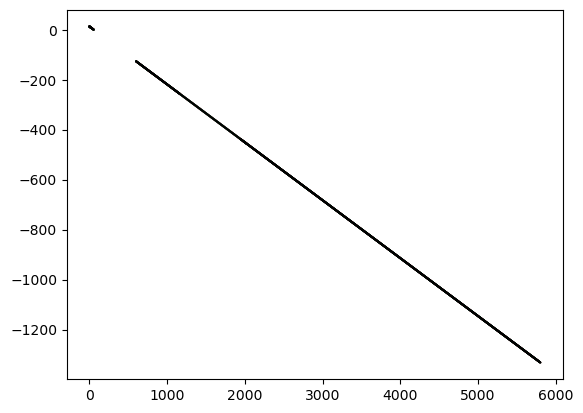

In [52]:
colors = ["orange", "red", "blue", "green", "black"]

reg_line=interception + slope*X
for color in colors:
    plt.plot(X, reg_line, c=color)
plt.scatter(X,y)
plt.show

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [54]:
print("r^2 : ",model.score(X,y) )
print("rmse : ",np.sqrt(mean_squared_error(pred, y)))
"""In summary, the regression model seems to have a strong relationship between the independent variables and the target variable (as indicated by the high R^2 value),
and the average prediction error of the model is relatively low (as indicated by the RMSE value).
"""

r^2 :  0.9808734920269122
rmse :  16.465711496024085


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:

data={"X":[1,3,4,6,8,9,11,14], "y":[1,2,4,4,5,7,8,13]}

df=pd.DataFrame(data)


X    int64
y    int64
dtype: object

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [20]:
x = df[['X']]
y = df['y']

model=LinearRegression()
model.fit(x,y)
slope = model.coef_
interception=model.intercept_


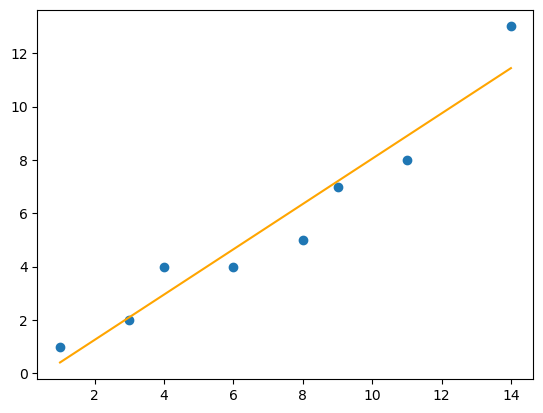

In [21]:
colors = ["orange"]
reg_line=interception + slope*x
for color in colors:
    plt.plot(x, reg_line, c=color)

plt.scatter(x, y)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# appears to be some correlation


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [22]:
z_scores = np.abs((df - df.mean()) / df.std())

threshold = 3

outliers = df[(z_scores > threshold).any(axis=1)]

df = df[(z_scores <= threshold).all(axis=1)]

print("Outliers:",outliers)
print("Data without outliers:",df)

Outliers: Empty DataFrame
Columns: [X, y]
Index: []
Data without outliers:     X   y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
i dont have outliers
